# INTERN NAME : SYED SOHAIB
# DOMAIN : DATA SCIENCE

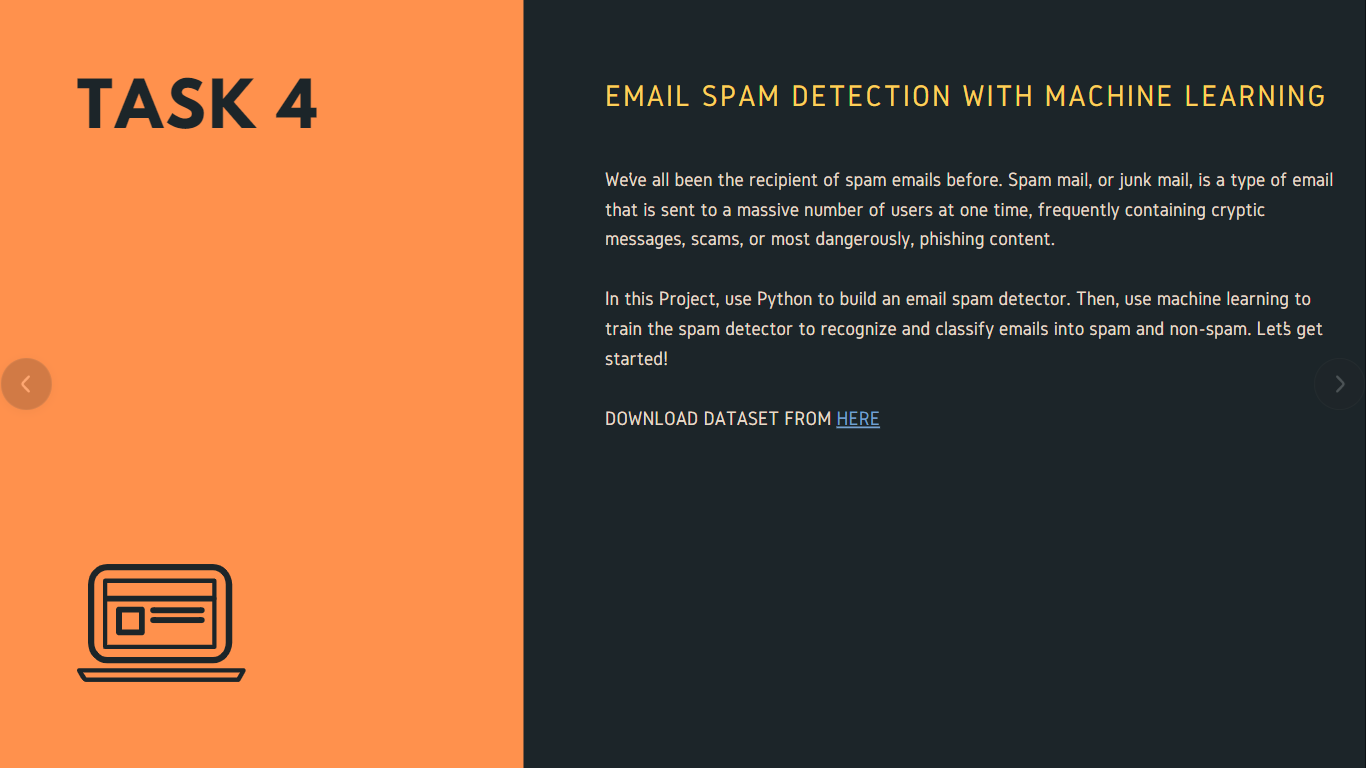

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
#importing necessory libraries

In [2]:
df = pd.read_csv('spam.csv' , encoding = 'ISO-8859-1') #reading dataset

In [3]:
df.head() #give first  entries

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.tail() #give last 5  entries

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.size 

27860

In [7]:
df.info()  # give inforamtion about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.describe()   #give Description about dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [9]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
df=df.rename(columns={'v1':'Target','v2':'Message'})

In [12]:
df.isnull().sum()

Target     0
Message    0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df.drop_duplicates(keep='first',inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df.size

10338

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Target']=encoder.fit_transform(df['Target'])
df['Target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5169, dtype: int32

In [18]:
df.head()

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


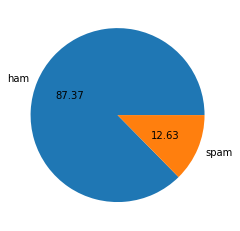

In [19]:
plt.pie(df['Target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [20]:
x=df['Message']
y=df['Target']

In [21]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5169, dtype: object


In [22]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5169, dtype: int32

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)  #splitting data into train and test

In [24]:
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn import svm

In [25]:
cv=CountVectorizer()

In [26]:
x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)

In [27]:
print(x_train_cv)

  (0, 1879)	1
  (0, 1170)	1
  (0, 6840)	1
  (0, 6610)	1
  (0, 2779)	1
  (1, 1939)	1
  (1, 4467)	1
  (1, 453)	1
  (1, 7176)	1
  (1, 7594)	1
  (1, 1577)	1
  (1, 203)	1
  (1, 4768)	1
  (1, 7175)	1
  (1, 7390)	1
  (1, 7590)	1
  (1, 4309)	1
  (1, 5157)	1
  (1, 3732)	1
  (1, 3015)	1
  (1, 2333)	1
  (1, 5210)	1
  (1, 4577)	1
  (1, 4731)	1
  (1, 5615)	1
  :	:
  (4134, 3290)	2
  (4134, 4817)	1
  (4134, 1546)	1
  (4134, 4195)	1
  (4134, 891)	1
  (4134, 1092)	1
  (4134, 1261)	1
  (4134, 7302)	1
  (4134, 6595)	1
  (4134, 1624)	1
  (4134, 1977)	1
  (4134, 7438)	1
  (4134, 6189)	1
  (4134, 6815)	1
  (4134, 2357)	1
  (4134, 4093)	1
  (4134, 6583)	1
  (4134, 5934)	1
  (4134, 1661)	1
  (4134, 5153)	1
  (4134, 6292)	1
  (4134, 3707)	1
  (4134, 6172)	1
  (4134, 3624)	1
  (4134, 4785)	1


In [28]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression() #creating model

In [29]:
lr.fit(x_train_cv,y_train)
prediction_train=lr.predict(x_train_cv)

In [30]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, prediction_train)*100)

99.75816203143893


In [31]:
prediction_test = lr.predict(x_test_cv)

In [32]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, prediction_test)*100)

97.58220502901354
